# 01-Les bases de Research avec Quantopian

**N'oubliez pas que ce notebook ne fonctionnera que sur Quantopian ! Créez un compte et téléversez (upload) le fichier de ce notebook. Ces commandes et fonctions ne fonctionneront que sur la plateforme de trading Quantopian !**

Notez qu'une grande partie du texte écrit dans ce notebook en Markdown provient directement des documents et tutoriels Quantopian, regardez les bien aussi, ils sont bien faits !

## Research

Le format notebook nous permet de rassembler facilement les informations sur les différents titres au sein de la plateforme Quantopian. Il faut garder à l'esprit que cela est différent de la plateforme de codage de base de Quantopian, qui se concentre sur la mise en œuvre effective et le backtesting des stratégies de trading.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PAS BESOIN D'UTILISER LA COMMANDE MAGIQUE SUR QUANTOPIAN !

## Obtenir des informations

Passons en revue quelques fonctions clés :

* get_pricing()
* symbols()
* local_csv()
* get_backtest()
* get_fundamentals()

## get_pricing()

La fonction `get_pricing` permet d'accéder à 12 ans de données sur le prix des actions américaines : les mêmes données que celles utilisées par le backtester Quantopian.

`get_pricing` retourne un <b>objet Pandas</b>. Il peut s'agir d'un dataframe ou d'une série, selon les valeurs d'entrée. 

In [17]:
mcdon = get_pricing('MCD',
                    start_date='2017-01-01', 
                    end_date = '2017-02-01', 
                    frequency='minute')

In [18]:
mcdon.head()

open_price    high     low  close_price    volume  \
2017-01-03 14:31:00+00:00      121.86  121.86  121.57       121.63  123665.0   
2017-01-03 14:32:00+00:00      121.73  121.92  121.41       121.45   13536.0   
2017-01-03 14:33:00+00:00      121.45  121.79  121.45       121.52   17562.0   
2017-01-03 14:34:00+00:00      121.45  121.80  121.44       121.75   12072.0   
2017-01-03 14:35:00+00:00      121.74  122.00  121.66       121.99    8100.0   

                            price  
2017-01-03 14:31:00+00:00  121.63  
2017-01-03 14:32:00+00:00  121.45  
2017-01-03 14:33:00+00:00  121.52  
2017-01-03 14:34:00+00:00  121.75  
2017-01-03 14:35:00+00:00  121.99

In [19]:
mcdon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2017-01-03 14:31:00+00:00 to 2017-02-01 21:00:00+00:00
Data columns (total 6 columns):
open_price     8188 non-null float64
high           8188 non-null float64
low            8188 non-null float64
close_price    8188 non-null float64
volume         8190 non-null float64
price          8190 non-null float64
dtypes: float64(6)
memory usage: 447.9 KB


In [33]:
# On ne peut revenir que 12 ans en arrière
# ce qui est vraiment tout ce dont vous avez besoin pour l'algo de trading', 
# remonter plus loin est probablement plus du bruit que du signal.

mcdon = get_pricing('MCD',
                    start_date='2005-01-01', 
                    end_date = '2017-01-01', 
                    frequency='daily')

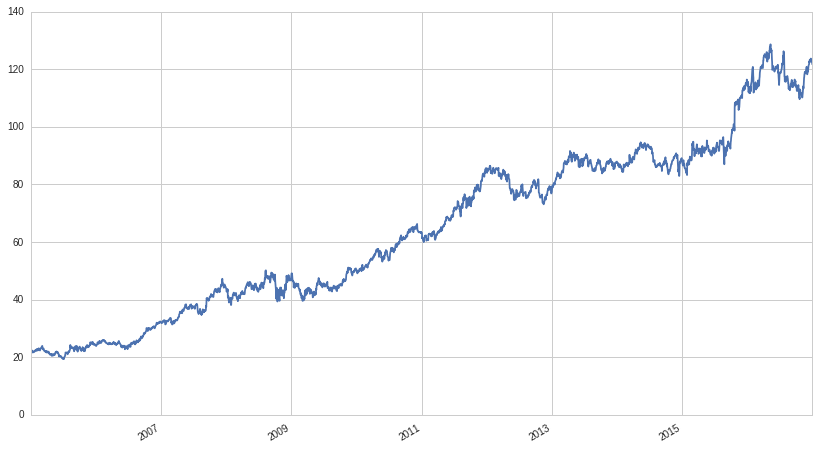

In [34]:
mcdon['close_price'].plot()

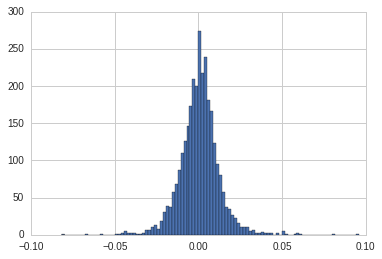

In [35]:
mcdon['close_price'].pct_change(1).hist(bins=100,figsize=(6,4))

## symbols()

By default `symbols` returns the security object for a ticker symbol. Specify a ticker symbol, or list of symbols, as a string and get a list of security objects back. 

- Use `symbol_reference_date` to identify which date you want the symbol back for a particular ticker symbol. 
- Specify how you would like missing results to be handled with `handle_missing`



In [39]:
mcdon_eq_info = symbols('MCD')

In [41]:
type(mcdon_eq_info)

<type 'zipline.assets._assets.Equity'>

In [48]:
for key in mcdon_eq_info.to_dict():
    print(key)
    print(mcdon_eq_info.to_dict()[key])
    print('\n')

end_date
2017-07-19 00:00:00+00:00


exchange
NYSE


auto_close_date
2017-07-24 00:00:00+00:00


symbol
MCD


first_traded
None


asset_name
MCDONALDS CORP


exchange_full
NEW YORK STOCK EXCHANGE


sid
4707


start_date
2002-01-01 00:00:00+00:00




## get_fundamentals()

La fonction `get_fundamentals` fournit un accès programmatique à la base de données fondamentale Quantopian. Basé sur les données fournies par Morningstar, `get_fundamentals` fournit plus de 600 mesures d'entreprises datant de 2002 (pour correspondre aux données de tarification de Quantopian). 

Les données utilisées par cette fonction de recherche sont les mêmes que celles utilisées par la fonction `get_fundamentals` utilisée dans l'IDE Quantopian. C'est décrit dans les documents d'aide Quantopian: http://www.quantopian.com/help/fundamentals.


In [49]:
# Il faut faire ça d'abord dans le notebook:
fundamentals = init_fundamentals()

The get_fundamentals() function takes in a SQLAlchemy query which can be quite complicated and strange looking at first. Basically it allows you to filter by a variety of fundamentals (things like Market Cap, P/E Ratio, or even city of HQ). Check out the link above for all the things you can filter by!

Let's walk through a few query examples.

First call fundamentals and use tab to check out the various options:

In [55]:
fundamentals. # call tab here as in the video!

SyntaxError: invalid syntax (<ipython-input-55-bbf6938c8013>, line 1)

In [57]:
# Market Cap
my_query = query(fundamentals.valuation.market_cap)

In [59]:
my_funds = get_fundamentals(my_query,'2017-01-01')

In [62]:
my_funds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, market_cap to market_cap
Columns: 5551 entries, Equity(21 [AAME]) to Equity(50554 [HEBT])
dtypes: float64(5551)
memory usage: 43.4+ KB


In [64]:
# Basically just returns the market cap of everything
# for 2017-01-01
my_funds.head()

Equity(21 [AAME])  Equity(24 [AAPL])  Equity(25 [ARNC_PR])  \
market_cap         80256300.0       6.224410e+11                   NaN   

            Equity(31 [ABAX])  Equity(39 [DDC])  Equity(41 [ARCB])  \
market_cap       1.190750e+09       808964000.0        722555000.0   

            Equity(52 [ABM])  Equity(53 [ABMD])  Equity(62 [ABT])  \
market_cap      2.265560e+09       4.927210e+09      5.640420e+10   

            Equity(64 [ABX])          ...           Equity(50533 [CNDT])  \
market_cap      1.910140e+10          ...                   3.029760e+09   

            Equity(50534 [HGV])  Equity(50535 [PK])  Equity(50537 [WRD])  \
market_cap         2.559150e+09        5.890500e+09         1.734880e+09   

            Equity(50539 [TIG])  Equity(50540 [TRVG])  \
market_cap         2.265930e+09          2.741480e+09   

            Equity(50541 [KEY_PRI])  Equity(50544 [KEG])  \
market_cap                      NaN           26639500.0   

            Equity(50547 [YTRA])  Equity(50554 [HEBT])  
market_cap           329764000.0            91800000.0  

[1 rows x 5551 columns]

In [74]:
# What you usualy do is filter by other qualities after the query!

# Only get companies worth 500 billion or more (that's a lot of dough!)
big_companies = (query(fundamentals.valuation.market_cap).
                 filter(fundamentals.valuation.market_cap > 500000000000) )

In [75]:
my_big_funds = get_fundamentals(big_companies,'2017-07-19')

In [76]:
# On 
my_big_funds

Equity(24 [AAPL])  Equity(5061 [MSFT])  Equity(26578 [GOOG_L])  \
market_cap       7.824930e+11         5.659140e+11            6.752440e+11   

            Equity(46631 [GOOG])  
market_cap          6.752440e+11

In [70]:
7.82 * 10**11

782000000000.0

In [50]:
get_fundamentals()

TypeError: get_fundamentals() takes at least 2 arguments (0 given)